# Import Libraries

In [1]:
pwd

'/content'

In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
from tqdm import tqdm
from model import *
from utils import *

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [4]:
train_data = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 124734742.55it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 82573751.75it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30784360.96it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15155551.92it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Dataloader Arguments & Test/Train Dataloaders


In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

CUDA Available? False


# Data Statistics

[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([64, 1, 28, 28])
torch.Size([64])


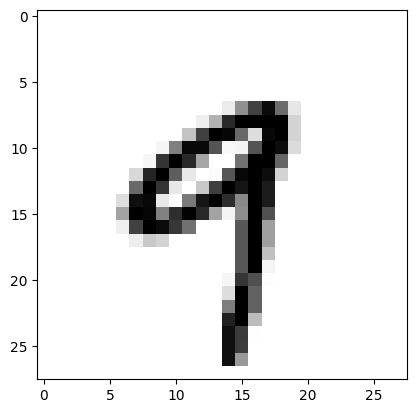

In [10]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_set = train_data.train_data
train_set = train_data.transform(train_set.numpy())

print('[Train]')
print(' - Numpy Shape:', train_data.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train_data.train_data.size())
print(' - min:', torch.min(train_set))
print(' - max:', torch.max(train_set))
print(' - mean:', torch.mean(train_set))
print(' - std:', torch.std(train_set))
print(' - var:', torch.var(train_set))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


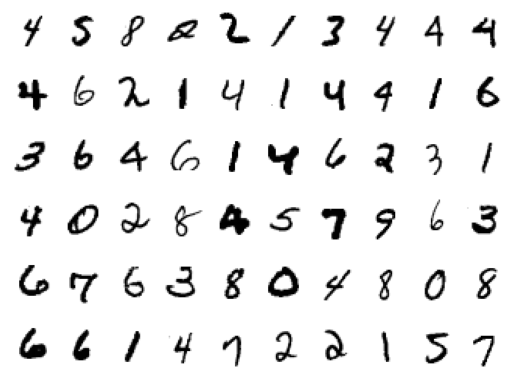

In [11]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# The model

In [16]:
from model import Net6

# Model Params

In [17]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_summary(Net6, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
           Dropout-3            [-1, 8, 26, 26]               0
              ReLU-4            [-1, 8, 26, 26]               0
            Conv2d-5            [-1, 8, 24, 24]             576
       BatchNorm2d-6            [-1, 8, 24, 24]              16
           Dropout-7            [-1, 8, 24, 24]               0
              ReLU-8            [-1, 8, 24, 24]               0
         MaxPool2d-9            [-1, 8, 12, 12]               0
           Conv2d-10           [-1, 16, 12, 12]           1,152
      BatchNorm2d-11           [-1, 16, 12, 12]              32
          Dropout-12           [-1, 16, 12, 12]               0
             ReLU-13           [-1, 16, 12, 12]               0
           Conv2d-14            [-1, 8,

# Training and Testing


In [18]:
train_losses_t = []
test_losses_t = []
train_acc_t = []
test_acc_t = []

# Let's Train and test our model

In [19]:
model =  Net6().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses, train_acc = train(model, device, train_loader, optimizer, epoch)
    train_losses_t += train_losses
    train_acc_t.append(train_acc)
    test_losses, test_acc = test(model, device, test_loader)
    test_losses_t += test_losses
    test_acc_t.append(test_acc)

EPOCH: 0


Loss=0.13252875208854675 Batch_id=937 Accuracy=81.63: 100%|██████████| 938/938 [00:50<00:00, 18.72it/s]



Test set: Average loss: 0.1406, Accuracy: 9614/10000 (96.14%)

EPOCH: 1


Loss=0.08166670054197311 Batch_id=937 Accuracy=97.03: 100%|██████████| 938/938 [00:51<00:00, 18.09it/s]



Test set: Average loss: 0.0795, Accuracy: 9768/10000 (97.68%)

EPOCH: 2


Loss=0.05326453596353531 Batch_id=937 Accuracy=97.63: 100%|██████████| 938/938 [00:47<00:00, 19.56it/s]



Test set: Average loss: 0.0511, Accuracy: 9866/10000 (98.66%)

EPOCH: 3


Loss=0.031018469482660294 Batch_id=937 Accuracy=97.89: 100%|██████████| 938/938 [00:51<00:00, 18.32it/s]



Test set: Average loss: 0.0526, Accuracy: 9846/10000 (98.46%)

EPOCH: 4


Loss=0.2826709747314453 Batch_id=937 Accuracy=98.11: 100%|██████████| 938/938 [00:50<00:00, 18.68it/s]



Test set: Average loss: 0.0564, Accuracy: 9832/10000 (98.32%)

EPOCH: 5


Loss=0.01770607754588127 Batch_id=937 Accuracy=98.22: 100%|██████████| 938/938 [00:51<00:00, 18.38it/s]



Test set: Average loss: 0.0526, Accuracy: 9835/10000 (98.35%)

EPOCH: 6


Loss=0.03915654867887497 Batch_id=937 Accuracy=98.31: 100%|██████████| 938/938 [00:48<00:00, 19.45it/s]



Test set: Average loss: 0.0395, Accuracy: 9889/10000 (98.89%)

EPOCH: 7


Loss=0.21325761079788208 Batch_id=937 Accuracy=98.40: 100%|██████████| 938/938 [00:47<00:00, 19.77it/s]



Test set: Average loss: 0.0386, Accuracy: 9872/10000 (98.72%)

EPOCH: 8


Loss=0.07568123191595078 Batch_id=937 Accuracy=98.45: 100%|██████████| 938/938 [00:46<00:00, 20.01it/s]



Test set: Average loss: 0.0358, Accuracy: 9896/10000 (98.96%)

EPOCH: 9


Loss=0.004660909529775381 Batch_id=937 Accuracy=98.53: 100%|██████████| 938/938 [00:47<00:00, 19.91it/s]



Test set: Average loss: 0.0360, Accuracy: 9896/10000 (98.96%)

EPOCH: 10


Loss=0.011378931812942028 Batch_id=937 Accuracy=98.57: 100%|██████████| 938/938 [00:46<00:00, 20.30it/s]



Test set: Average loss: 0.0632, Accuracy: 9822/10000 (98.22%)

EPOCH: 11


Loss=0.04589884728193283 Batch_id=937 Accuracy=98.60: 100%|██████████| 938/938 [00:46<00:00, 19.99it/s]



Test set: Average loss: 0.0356, Accuracy: 9903/10000 (99.03%)

EPOCH: 12


Loss=0.13986335694789886 Batch_id=937 Accuracy=98.64: 100%|██████████| 938/938 [00:50<00:00, 18.43it/s]



Test set: Average loss: 0.0457, Accuracy: 9869/10000 (98.69%)

EPOCH: 13


Loss=0.01712305285036564 Batch_id=937 Accuracy=98.73: 100%|██████████| 938/938 [00:47<00:00, 19.92it/s]



Test set: Average loss: 0.0382, Accuracy: 9884/10000 (98.84%)

EPOCH: 14


Loss=0.007475072983652353 Batch_id=937 Accuracy=98.71: 100%|██████████| 938/938 [00:47<00:00, 19.61it/s]



Test set: Average loss: 0.0435, Accuracy: 9870/10000 (98.70%)



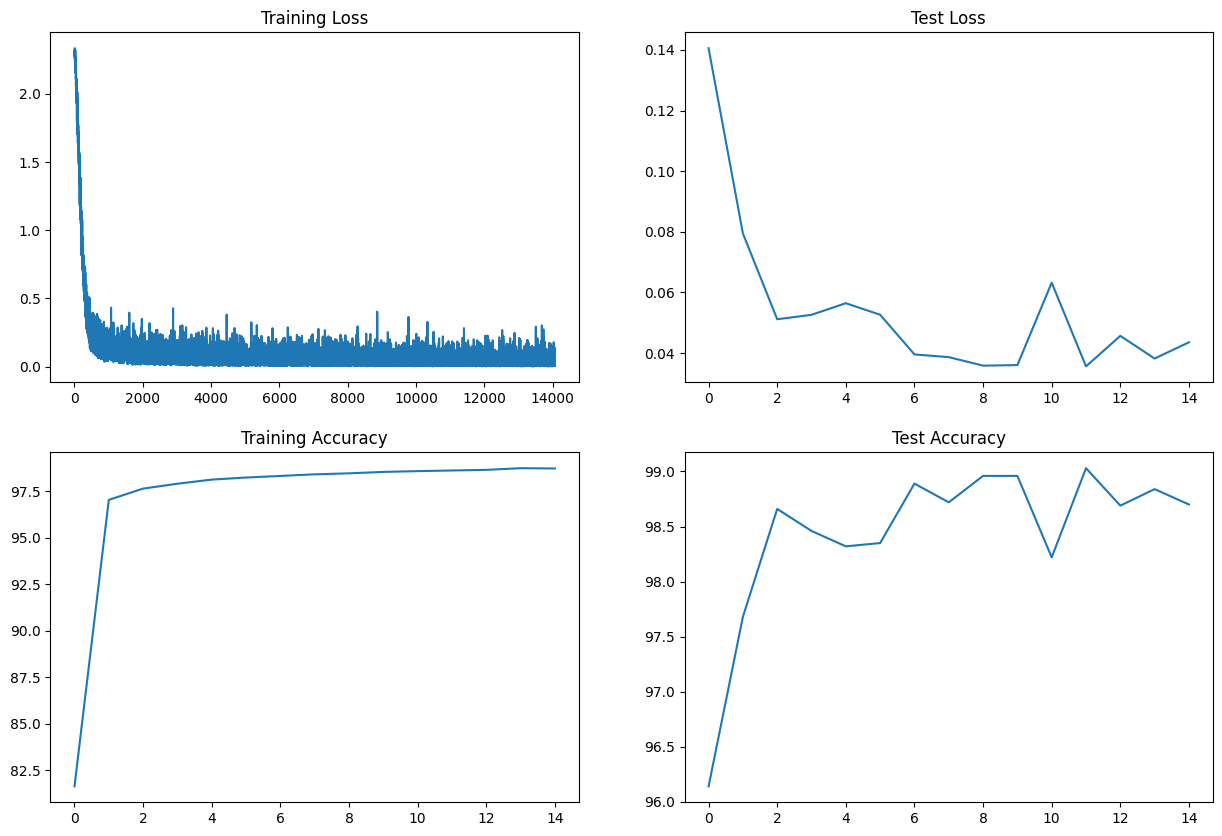

In [20]:
plot_loss_acc(train_losses_t, train_acc_t, test_losses_t, test_acc_t)